In [1]:
using Gadfly

In [2]:
using Compose


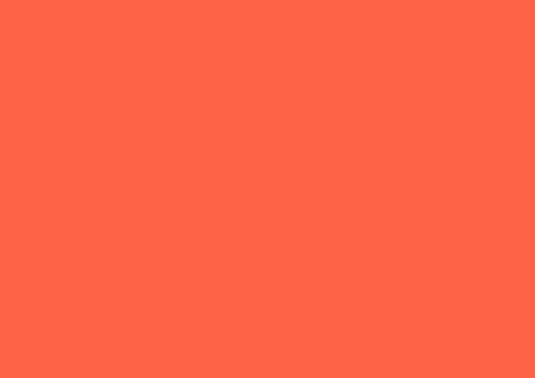

In [3]:
compose(context(), rectangle(), fill("tomato"));
# draw(svg, compose(context(), rectangle(), fill("tomato")))

In [4]:
set_default_graphic_size(10cm, 10cm)

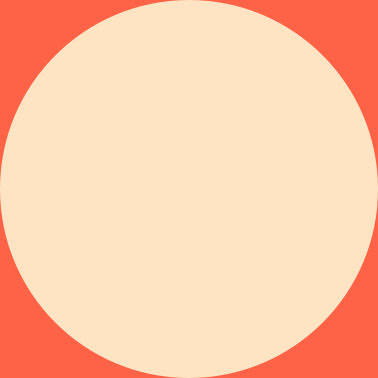

In [5]:
compose(context(),
        (context(), circle(), fill("bisque")),
        (context(), rectangle(), fill("tomato")))

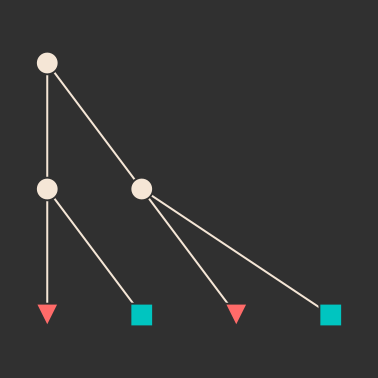

In [6]:
tomato_bisque =
    compose(context(),
            (context(), circle(), fill("bisque")),
            (context(), rectangle(), fill("tomato")))

introspect(tomato_bisque)


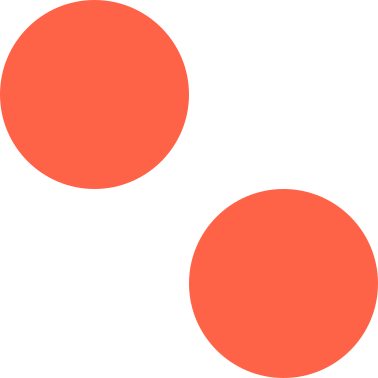

In [13]:
compose(context(), fill("tomato"),
        (context(0.0, 0.0, 0.5, 0.5), circle()),
        (context(0.5, 0.5, 0.5, 0.5), circle()))


In [14]:
help(Compose.fill)

Base.fill(x, dims)

   Create an array filled with the value "x". For example,
   "fill(1.0, (10,10))" returns a  10x10 array of floats, with each
   element initialized to 1.0.

   If "x" is an object reference, all elements will refer to the
   same object. "fill(Foo(), dims)" will return an array filled with
   the result of evaluating "Foo()" once.


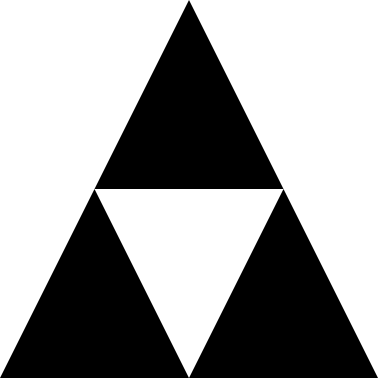

In [15]:
function sierpinski(n)
    if n == 0
        compose(context(), polygon([(1,1), (0,1), (1/2, 0)]))
    else
        t = sierpinski(n - 1)
        compose(context(),
                (context(1/4,   0, 1/2, 1/2), t),
                (context(  0, 1/2, 1/2, 1/2), t),
                (context(1/2, 1/2, 1/2, 1/2), t))
    end
end

s3 = compose(sierpinski(1), fill("black"))
# introspect(s3)


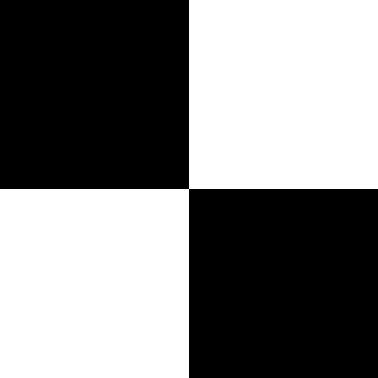

In [16]:
function sierpinski_square(n)
    if n == 0
        compose(context(), rectangle() )
    else
        t = sierpinski_square(n - 1)
        compose(context(),
                (context(0, 0, 1/2, 1/2), t),
#                 (context(1/2, 0, 1/4, 1/4), t),
#                 (context(3/4, 1/4, 1/4, 1/4), t),
                (context(1/2, 1/2, 1/2, 1/2), t),
        )
    end
end

s3 = compose(sierpinski_square(1), fill("black"))
# introspect(s3)


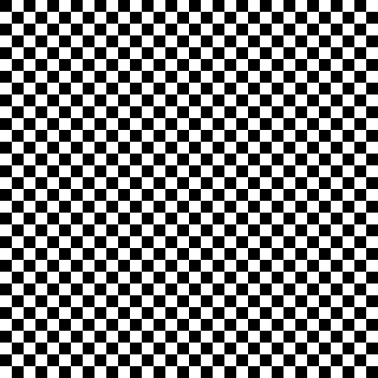

In [17]:
function squares(n::Int)
    if n <= 0
        compose(context(), rectangle(0, 0, 1/2, 1/2), rectangle(1/2, 1/2, 1/2, 1/2))
    else
        t = squares(n - 1)
        compose(context(),
                (context(0, 0, 1/2, 1/2), t),
                (context(1/2,   0, 1/2, 1/2), t),
                (context(  0, 1/2, 1/2, 1/2), t),
                (context(1/2, 1/2, 1/2, 1/2), t),
#                 (context(1/2, 1/2, 1/2, 1/2), t),
        )
    end
end

s3 = compose(squares(4), fill("black"))
# introspect(s3)


In [18]:
sc(n) = compose(squares(n), fill("black"))


sc (generic function with 1 method)

In [19]:
img = SVG("squares-4.svg", 4inch, 4inch)
img = PDF("squares-4.pdf", 4inch, 4inch)
draw(img, sc(4))


In [20]:
if !isdir("squares") 
    mkdir("squares/")
end

for i in 1:4
    println("Saving: $i")
    for dim in [ 4, 6, 8]
        println("Dim: $(dim) inch")
        imgSvg = SVG("squares/image (name=grid ; (layers=$i ; dim=$dim).svg", dim*1inch, dim*1inch)
        imgPdf = PDF("squares/image (name=grid ; layers=$i ; dim=$dim).pdf", dim*1inch, dim*1inch)
        draw(imgSvg, sc(i))
        draw(imgPdf, sc(i))
    end
end

Saving: 1
Dim: 4 inch
Dim: 6 inch
Dim: 8 inch
Saving: 2
Dim: 4 inch
Dim: 6 inch
Dim: 8 inch
Saving: 3
Dim: 4 inch
Dim: 6 inch
Dim: 8 inch
Saving: 4
Dim: 4 inch
Dim: 6 inch
Dim: 8 inch


In [21]:
dim = 4inch

Measure{MeasureNil,MeasureNil}(101.6,MeasureNil(),MeasureNil(),0.0,0.0)

In [22]:
pwd()

"/Users/elcritch/proj/code/scilab/notebooks"

## Cantor Dust

Cantor dust is a multi-dimensional version of the Cantor set. It can be formed by taking a finite Cartesian product of the Cantor set with itself, making it a Cantor space. Like the Cantor set, Cantor dust has zero measure.[11]

$a^{\frac{1}{3}}$

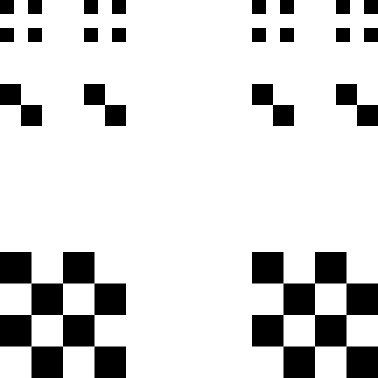

In [23]:
# ½
# ¼
# ¾
# ⅔

α = 1/3

function cantor(n::Int)
    if n == 0
        compose(context(), 
            rectangle(  0,   0, 1/3, 1/3), 
            rectangle(2/3,   0, 1/3, 1/3), 
            rectangle(  0, 2/3, 1/3, 1/3), 
            rectangle(2/3, 2/3, 1/3, 1/3), 
        )
    else
        t = cantor(n - 1)
        s = squares(n-1)
        frac = 1/3
        compose(context(),
    
            (context(  0,   0, frac, frac),t),
            (context(2/3,   0, frac, frac),t),
            (context(  0, 2/3, frac, frac),s),
            (context(2/3, 2/3, frac, frac),s),

#         (context(1/3, 1/3, 1/3, 1/3),t), 

#             (context(1/3, 0/3, 1/3, 1/3),s), 
#             (context(0/3, 1/3, 1/3, 1/3),s), 
#             (context(2/3, 1/3, 1/3, 1/3),s), 
#             (context(1/3, 2/3, 1/3, 1/3),s), 
        )
    end
end

compose(cantor(2), fill("black"))



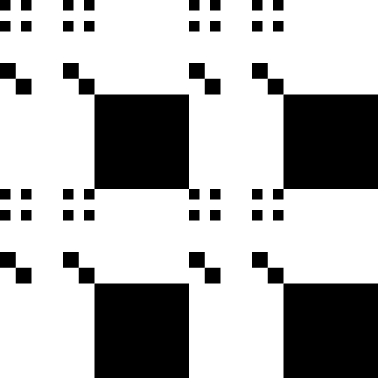

In [24]:
function squares2(n::Int)
    scale = 1/2
    if n <= 0
        compose(context(), 
            (context(0,   0, scale, scale),cantor(1)), 
            rectangle(1/2, 1/2, scale, scale),
        )
    else
        t = squares2(n - 1)
        s = cantor(n-1)
        scale = 1/2
        compose(context(),
        
        (context(  0,   0, scale, scale), t),
        (context(1/2,   0, scale, scale), t),
        (context(  0, 1/2, scale, scale), t),
        (context(1/2, 1/2, scale, scale), t),
#                 (context(1/2, 1/2, 1/2, 1/2), t),
        )
    end
end

s3 = compose(squares2(1), fill("black"))
# introspect(s3)


0.2343750.234375


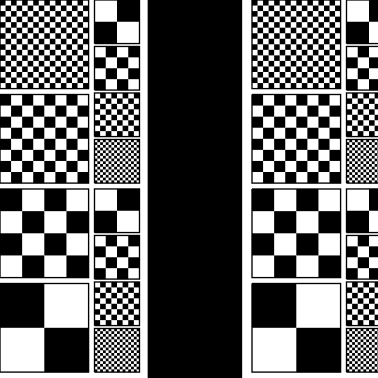

In [25]:
function cameraGrid()
    quid = 1/64
    sf1 = 1/4-quid
    sf2 = 1/4-quid

    println(sf1, sf2)
    p(n) = n/4

    emptybox = compose(context(), line([(0,0),(1,0),(1,1),(0,1),(0,0)]), linewidth(1pt), stroke("black"))

    n = 3
    s3 = compose(context(),
            (context(p(0), p(0), sf2, sf1), squares(n-0), emptybox),
            (context(p(0), p(1), sf2, sf1), squares(n-1), emptybox),
            (context(p(0), p(2), sf2, sf1), squares(n-2), emptybox),
            (context(p(0), p(3), sf2, sf1), (context(), squares(n-3)), emptybox ),
    )

    cg = compose(context(), 
        (context(0,0,1,1), s3),
        (context(1/4,1/2-quid,1/2+quid/2,-1/2+quid/2), s3),
        (context(1/4,1-quid,1/2+quid/2,-1/2+quid/2), s3),
    )
    
    return compose(context(), 
        (context(), cg), 
        (context(1/2-1/8+quid,0,1/4,1), rectangle()),
        (context(2/3,0,1,1), cg),
    )
end

cameraGrid()

0.2343750.234375


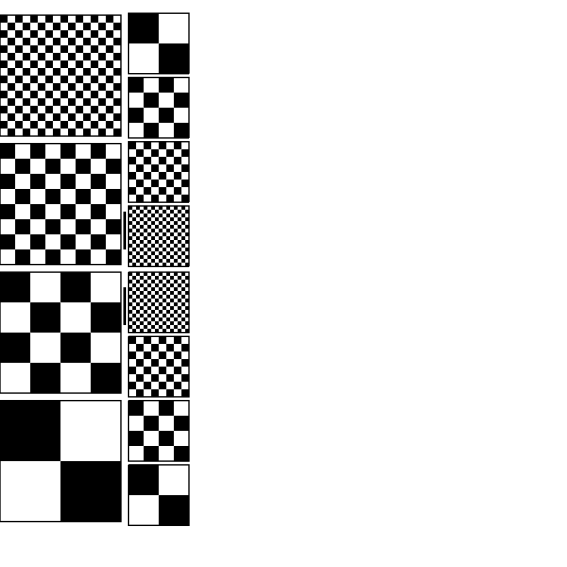

In [26]:
function cameraGrid2()
    quid = 1/64
    sf1 = 1/4-quid
    sf2 = 1/4-quid

    println(sf1, sf2)

    emptybox = compose(context(), line([(0,0),(1,0),(1,1),(0,1),(0,0)]), linewidth(1pt), stroke("black"))

    function subGrid(len; separation=1/16, n=3)
        len1 = len2 = len;
        px(i) = 0
        py(i) = i*len + (i+1)*len*separation 
        
        compose(context(0,0,len,4*len),
            (context(px(0), py(0), len1, len2), squares(n-0), emptybox),
            (context(px(0), py(1), len1, len2), squares(n-1), emptybox),
            (context(px(0), py(2), len1, len2), squares(n-2), emptybox),
            (context(px(0), py(3), len1, len2), squares(n-3), emptybox),
        )
    end

    function gridLine(;len=32mm, separation = 1/16)
        
        sep = len*separation
        compose(context(0,0, 2*len, 4*len),
            (context(0,sep,1,1), subGrid(len; separation=separation)),
            (context(1*len+8*sep+sep,2*len+4*sep-sep/4,1,-1), subGrid(-1*len/2; separation=separation)),
            (context(1*len+1*sep,2*len+4*sep-sep/2,1,1), subGrid(1*len/2; separation=separation)),
            (context(1*len+1*sep/2,6mm+2*len-7*sep, 1,1), line([(0,0),(0,10mm)]), linewidth(2pt), stroke("black")),
            (context(1*len+1*sep/2,6mm+2*len+3*sep, 1,1), line([(0,0),(0,10mm)]), linewidth(2pt), stroke("black")),
        )
    end
    
    fullLen = 32mm
    cg = gridLine(len=32mm)
    
    return compose(context(0,0,fullLen,4*fullLen), 
        (context(0, 0, 1, 1), cg),
#         (context(1/2-1/8+quid,0,1/4,1), rectangle()),
#         (context(32mm+32mm/8, 0, 1/4, 1/4), cg),
    )
end

set_default_graphic_size(15cm, 15cm)
cameraGrid2()

In [27]:
if !isdir("squares") 
    mkdir("squares/")
end

# set_default_graphic_size(8.5inch, 11inch)

for i in [3,]
    println("Saving: $i")
        imgPdf = PDF("squares/image (name=camera grid 2; layers=4 ; dim=32mm ).pdf", 8.5inch, 11inch)
        draw(imgPdf, compose(context(+1inch,+1inch,8.5inch, 11inch), cameraGrid2()))
end

Saving: 3
0.2343750.234375


0.2343750.234375


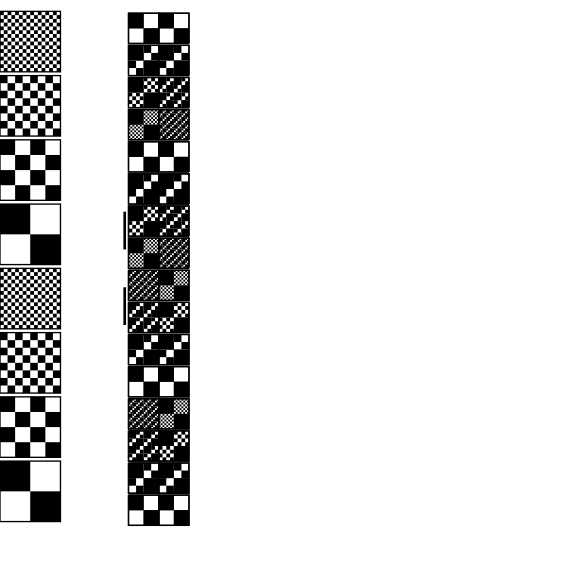

In [55]:
function cameraGrid3()
    quid = 1/64
    sf1 = 1/4-quid
    sf2 = 1/4-quid

    println(sf1, sf2)

    emptybox = compose(context(), line([(0,0),(1,0),(1,1),(0,1),(0,0)]), linewidth(1pt), stroke("black"))

    function subGrid(len; separation=1/16, n=3)
        len1 = len/2;
        len2 = len/2;
        px(i) = 0
        py(i) = i*len/2 + (i+1)*len/2*separation 
        
        compose(context(0,0,len,8*len),
            (context(px(0), py(0), len1, len2), squares(n-0), emptybox),
            (context(px(0), py(1), len1, len2), squares(n-1), emptybox),
            (context(px(0), py(2), len1, len2), squares(n-2), emptybox),
            (context(px(0), py(3), len1, len2), squares(n-3), emptybox),
            (context(px(0), py(4), len1, len2), squares(n-0), emptybox),
            (context(px(0), py(5), len1, len2), squares(n-1), emptybox),
            (context(px(0), py(6), len1, len2), squares(n-2), emptybox),
            (context(px(0), py(7), len1, len2), squares(n-3), emptybox),
        )
    end

    function gridLine(;len=32mm, separation = 1/16)
        
        sep = len*separation
        compose(context(0,0, 2*len, 4*len),
            (context(0,sep,1,1), subGrid(len; separation=separation)),
        
            (context(1*len+8*sep+sep,2*len+4*sep-sep/4,1,-1), subGrid(-1*len/2; separation=separation)),
            (context(1*len+1*sep,    2*len+4*sep-sep/2,1,1), subGrid(1*len/2; separation=separation)),

            (context(1*len+8*sep+sep,2*len+4*sep-sep/4,1,-1), subGrid(-1*len/2; n=2, separation=separation)),
            (context(1*len+1*sep,    2*len+4*sep-sep/2,1,1), subGrid(1*len/2; n=2, separation=separation)),

            (context(1*len+5*sep, 2*len+4*sep-sep/4,1,-1), subGrid(-1*len/2; separation=separation)),
            (context(1*len+5*sep,        2*len+4*sep-sep/2,1,1), subGrid(1*len/2; separation=separation)),

            (context(1*len+5*sep, 2*len+4*sep-sep/4,1,-1), subGrid(-1*len/2; n=0, separation=separation)),
            (context(1*len+5*sep,        2*len+4*sep-sep/2,1,1), subGrid(1*len/2; n=0, separation=separation)),

            (context(1*len+1*sep/2,6mm+2*len-7*sep, 1,1), line([(0,0),(0,10mm)]), linewidth(2pt), stroke("black")),
            (context(1*len+1*sep/2,6mm+2*len+3*sep, 1,1), line([(0,0),(0,10mm)]), linewidth(2pt), stroke("black")),
        )
    end
    
    fullLen = 32mm
    cg = gridLine(len=32mm)
    
    return compose(context(0,0,fullLen,4*fullLen), 
        (context(0, 0, 1, 1), cg),
#         (context(1/2-1/8+quid,0,1/4,1), rectangle()),
#         (context(32mm+32mm/8, 0, 1/4, 1/4), cg),
    )
end

set_default_graphic_size(15cm, 15cm)
cameraGrid3()

In [56]:
if !isdir("squares") 
    mkdir("squares/")
end

# set_default_graphic_size(8.5inch, 11inch)

for i in [3,]
    println("Saving: $i")
        imgPdf = PDF("squares/image (name=camera grid 3; layers=4 ; dim=32mm ).pdf", 8.5inch, 11inch)
        draw(imgPdf, compose(context(+1inch,+1inch,8.5inch, 11inch), cameraGrid3()))
end

Saving: 3
0.2343750.234375
